<a href="https://colab.research.google.com/github/Rostyslaw1/Demianov/blob/main/Laboratory4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Інсталяція середовища та необхідних залежностей

In [ ]:
!pip install qiskit
!pip install pylatexenc
from qiskit.exceptions import QiskitError
from qiskit.extensions import Initialize
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info.operators.random import random_unitary
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.visualization import plot_histogram
from pylatexenc import *
from math import pi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from qiskit import *
te_backend = Aer.get_backend('statevector_simulator')

# Протокол квантової телепортації

Аліса хоче відправити квантумну інформацію до Боба. Вона хоче відправити стан кубіта |ψ⟩ = α|0⟩ + β|1⟩. Щоб зробити це, очікується надсилання інформації про α та β до Боба.

Згідно теореми неможливості клонування можна зрозуміти, що Аліса не може просто створити копію |ψ⟩ та надіслати її Бобу. Ми можемо скопіювати тільки класичний стан (не суперпозицію).

Хоча, виористовуючи два класичних біта та пару зв'язаних кубітів, Аліса може надіслати стан |ψ⟩ до Боба. Це зветься телепортацією, так як в результаті Боб буде мати стан |ψ⟩, а у Аліси його уже не буде.

Для того щоб надіслати квантумний біт, Аліса та Боб повинні використати третю сторону (Єву) для надсилання їм зв'язаної пари кубітів. Після цього Аліса зробить потрібні операції над її кубітом, та надішле результати до Боба за допомогою класичного каналу зв'язку, і Боб зробить свої операції на його стороні, для того, щоб отримати кубіт Аліси.

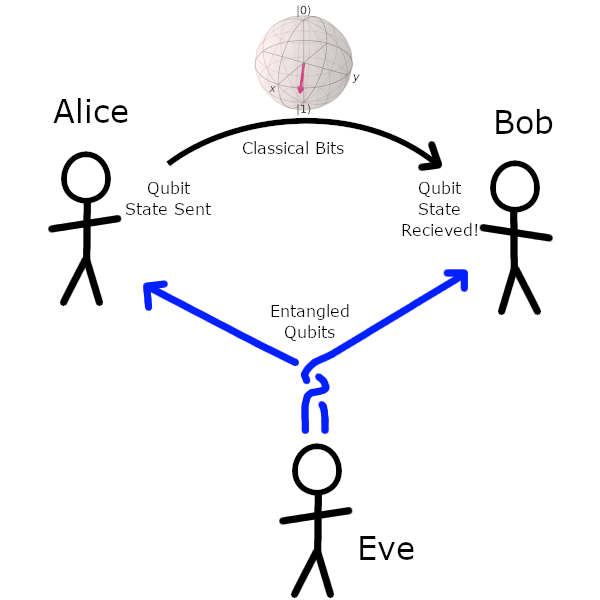

# Реалізація квантової мікросхеми

Створюємо квантову мікросхему з трьома кубітами і двома класичними бітами в двох різних регістрах.

In [ ]:
te_quantum_register = QuantumRegister(3)
te_classical_register_1 = ClassicalRegister(1)
te_classical_register_2 = ClassicalRegister(1)
te_circuit = QuantumCircuit(te_quantum_register, te_classical_register_1, te_classical_register_2)

На першому кроці третя сторона (Єва) створює пару зв'язаних кубітів та дає один з них Бобу, а інший Алісі.

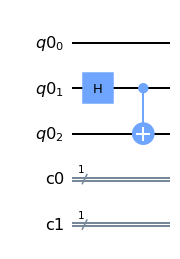

In [ ]:
te_circuit.h(1)
te_circuit.cx(1, 2)
te_circuit.draw('mpl')

Можна зробити висновок, що Аліса має кубіт q1, а Боб має кубіт q2.

In [ ]:
На другому кроці Аліса застосовує CNOT-ворота над кубітом q1, контрольованим |ψ⟩ (кубітом, який вона хоче надіслати Бобові). Потім Аліса застосовує ворота H-ворота до |ψ⟩. Кубіт, що Аліса хоче відправити є q0.


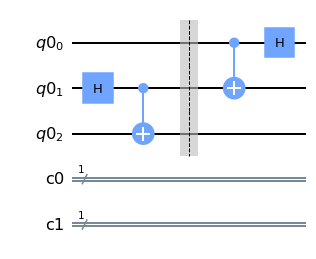

In [ ]:
te_circuit.barrier()
te_circuit.cx(0, 1)
te_circuit.h(0)
te_circuit.draw('mpl')

На третьому кроці Аліса застосовує вимірювання до обох кубітів, що вона має, q1 і |ψ⟩, та зберігає ці результати в двох класичних бітах. Тоді вона надсилає ці два класичних біта до Боба.


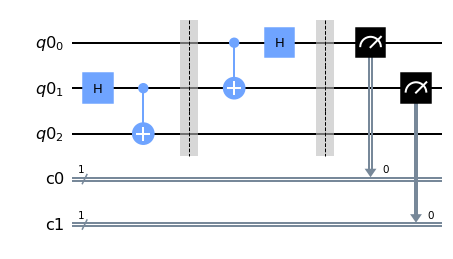

In [ ]:
# to separate pieces of a circuit
te_circuit.barrier()
te_circuit.measure(0, 0)
te_circuit.measure(1, 1)
te_circuit.draw('mpl')

На четвертому кроці Боб має кубіт q2, потім застосовує наступні операції (ворота) в залежності від станів класичних бітів:

    00 -> Нічого не робити
    01 -> Застосувати X-ворота
    10 -> Застосувати Z-ворота
    11 -> Застосувати ZX-ворота

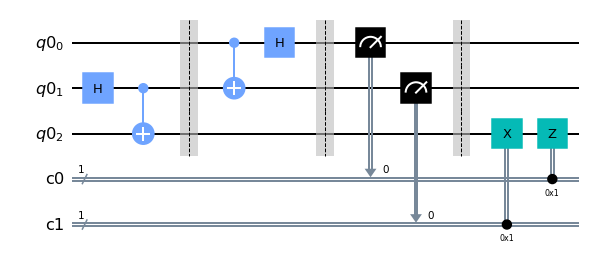

In [ ]:
te_circuit.barrier()
# Set a classical equality condition on this instruction
te_circuit.x(2).c_if(te_classical_register_2, 1)
te_circuit.z(2).c_if(te_classical_register_1, 1)
te_circuit.draw('mpl')

В результаті кубіт Аліси повинен бути телепортований до Боба.

# Запуск на симуляторі

Отже, для симуляції квантової телепортації, для початку ініціалізуємо кубіт Аліси яким-небудь значенням |ψ⟩ (psi).

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


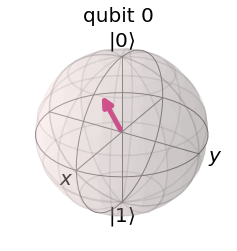

In [ ]:
def init_state(backend):
  circuit = QuantumCircuit(1)
  circuit.h(0)
  circuit.rz(pi/4, 0)
  circuit.z(0)
  return execute(circuit, backend).result().get_statevector()

!pip install qiskit
!pip install pylatexenc
from qiskit.visualization import plot_bloch_multivector
from qiskit.extensions import Initialize

from qiskit import *
from math import pi
te_backend = Aer.get_backend('statevector_simulator')
psi = init_state(te_backend)
plot_bloch_multivector(psi)


In [ ]:
init_gate = Initialize(psi)
init_gate.label = "init"

Реалізуємо схему із встановленим станом

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


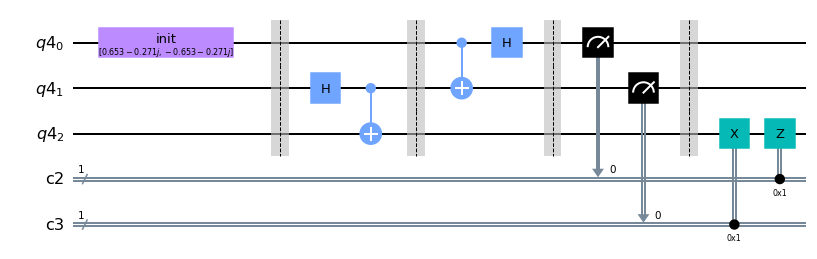

In [ ]:
!pip install pylatexenc

te_quantum_register = QuantumRegister(3)
te_classical_register_1 = ClassicalRegister(1)
te_classical_register_2 = ClassicalRegister(1)
te_circuit = QuantumCircuit(te_quantum_register, te_classical_register_1, te_classical_register_2)

te_circuit.append(init_gate, [0])
te_circuit.barrier()

te_circuit.h(1)
te_circuit.cx(1, 2)

te_circuit.barrier()
te_circuit.cx(0, 1)
te_circuit.h(0)

te_circuit.barrier()
te_circuit.measure(0, 0)
te_circuit.measure(1, 1)

te_circuit.barrier()
te_circuit.x(2).c_if(te_classical_register_2, 1)
te_circuit.z(2).c_if(te_classical_register_1, 1)
te_circuit.draw('mpl')

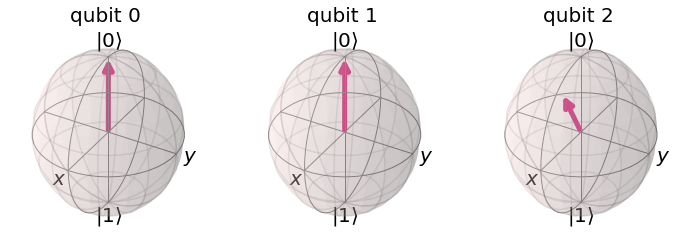

In [ ]:
te_state_vector = execute(te_circuit, te_backend).result().get_statevector()
plot_bloch_multivector(te_state_vector)

Із результатів виконання можемо побачити що стан кубіта q0 був телепортований до кубіта q2. Схема реалізована усаішно.

# Запуск на реальному квантовому компʼютері

In [ ]:
inverse_init_gate = init_gate.gates_to_uncompute()

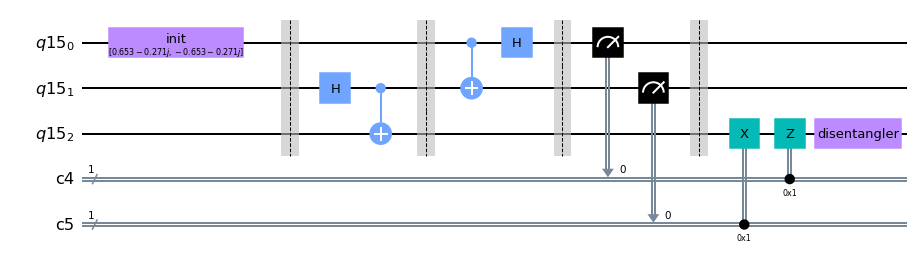

In [ ]:
te_quantum_register = QuantumRegister(3)
te_classical_register_1 = ClassicalRegister(1)
te_classical_register_2 = ClassicalRegister(1)
te_circuit = QuantumCircuit(te_quantum_register, te_classical_register_1, te_classical_register_2)

te_circuit.append(init_gate, [0])
te_circuit.barrier()

te_circuit.h(1)
te_circuit.cx(1, 2)

te_circuit.barrier()
te_circuit.cx(0, 1)
te_circuit.h(0)

te_circuit.barrier()
te_circuit.measure(0, 0)
te_circuit.measure(1, 1)

te_circuit.barrier()
te_circuit.x(2).c_if(te_classical_register_2, 1)
te_circuit.z(2).c_if(te_classical_register_1, 1)

te_circuit.append(inverse_init_gate, [2])

te_circuit.draw('mpl')

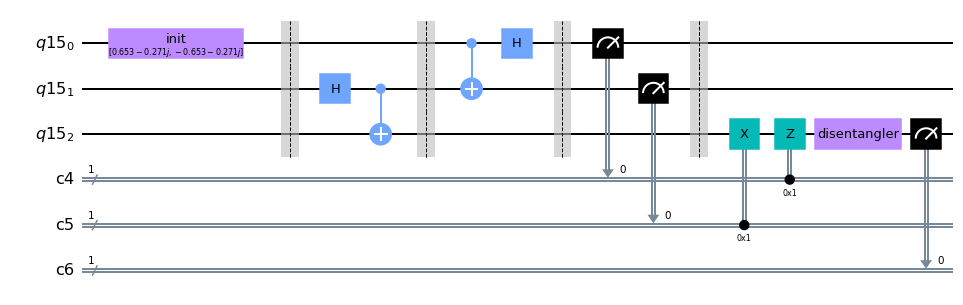

In [ ]:
te_classical_register_result = ClassicalRegister(1)
te_circuit.add_register(te_classical_register_result)
te_circuit.measure(2,2)
te_circuit.draw('mpl')

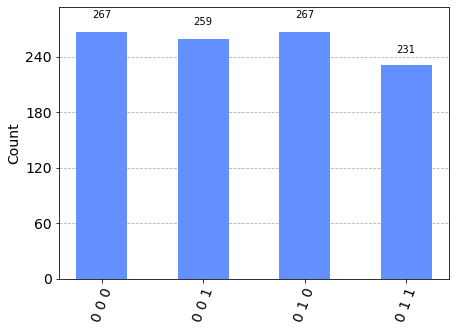

In [ ]:
qasm_backend = BasicAer.get_backend('qasm_simulator')
te_counts = execute(te_circuit, qasm_backend, shots=1024).result().get_counts()
plot_histogram(te_counts)

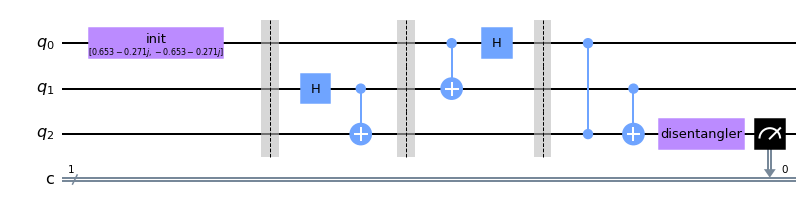

In [ ]:
te_circuit = QuantumCircuit(3, 1)

te_circuit.append(init_gate, [0])

te_circuit.barrier()
te_circuit.h(1)
te_circuit.cx(1, 2)

te_circuit.barrier()
te_circuit.cx(0, 1)
te_circuit.h(0)

te_circuit.barrier()
te_circuit.cz(0, 2)
te_circuit.cx(1, 2)

te_circuit.append(inverse_init_gate, [2])
te_circuit.measure(2, 0)

te_circuit.draw('mpl')

Встановлюємо зєднання з квантовим компютером IBM

In [ ]:
MY_API_TOKEN = '9b16f45807e0179bed75a4c504f605d411087827c026003cda456b63f4aae8fb613762b769ca00a88603b47aa062889b7a6a56c1f3864ee484fb45bb4d9d2ebf'
IBMQ.save_account(MY_API_TOKEN)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [ ]:
te_provider = IBMQ.get_provider('ibm-q')
te_provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [ ]:
te_real_backend = least_busy(te_provider.backends(filters=lambda b: b.configuration().n_qubits >= 3 and
                                   not b.configuration().simulator and b.status().operational==True))
te_job_exp = execute(te_circuit, backend = te_real_backend, shots=8192)

{'0': 7540, '1': 652}


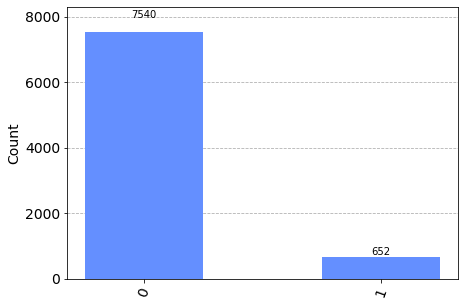

In [ ]:
te_exp_result = te_job_exp.result()
te_exp_measurement_result = te_exp_result.get_counts(te_circuit)
print(te_exp_measurement_result)
plot_histogram(te_exp_measurement_result)

Із результатів помітно що є деяка ймовірність отримати |1>. Ці значення було отримано через помилки в реальному квантовому комп'ютері. Для прикладу - запуск на симуляторі демонструє ідеальну телепортацію без помилок.

In [ ]:
error_rate_percent = sum([te_exp_measurement_result[result] for result in te_exp_measurement_result.keys() if result[0]=='1']) \
                    * 100./ sum(list(te_exp_measurement_result.values()))
print("Відсоток помилок експерименту: ", error_rate_percent, "%")

Відсоток помилок експерименту:  7.958984375 %
